#Data Exploration and Pre-processing

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load training and testing data sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

The Titanic: Machine Learning from Disaster dataset includes information about 891 passengers aboard the Titanic. This dataset contains various features such as ticket class, sex, age, number of siblings or spouses aboard, number of parents or children aboard, ticket number, passenger fare, cabin number, and point of embarkation. Additionally, the training dataset specifies whether each passenger survived or not, which serves as the target variable.

In [34]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(train.head())

# Display summary information about the dataset
print("\nDataset Summary:")
print(train.info())

# Display the shape of the dataset
print("\nDataset Shape:")
print(train.shape)

Dataset Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

I split the dataset into numerical and categorical features to facilitate a more focused analysis. To explore the distribution of the numerical features, I visualized them using histograms. Upon examining the distributions, I identified that the SibSp, Parch, and Fare features exhibited a positive skew, which suggesting the data is not symmetrically distributed.

In [35]:
# Split features into numerical and categorical for analysis
numerical_features = train.select_dtypes(include=['number'])
categorical_features = train.select_dtypes(include=['object'])

# Display Summary Statistics
print("Numerical Summary Statistics:")
print(train.describe())

print("\nCategorical Summary Statistics:")
print(train.describe(include=['O']))

Numerical Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Categorical Summary Statistics:
                  

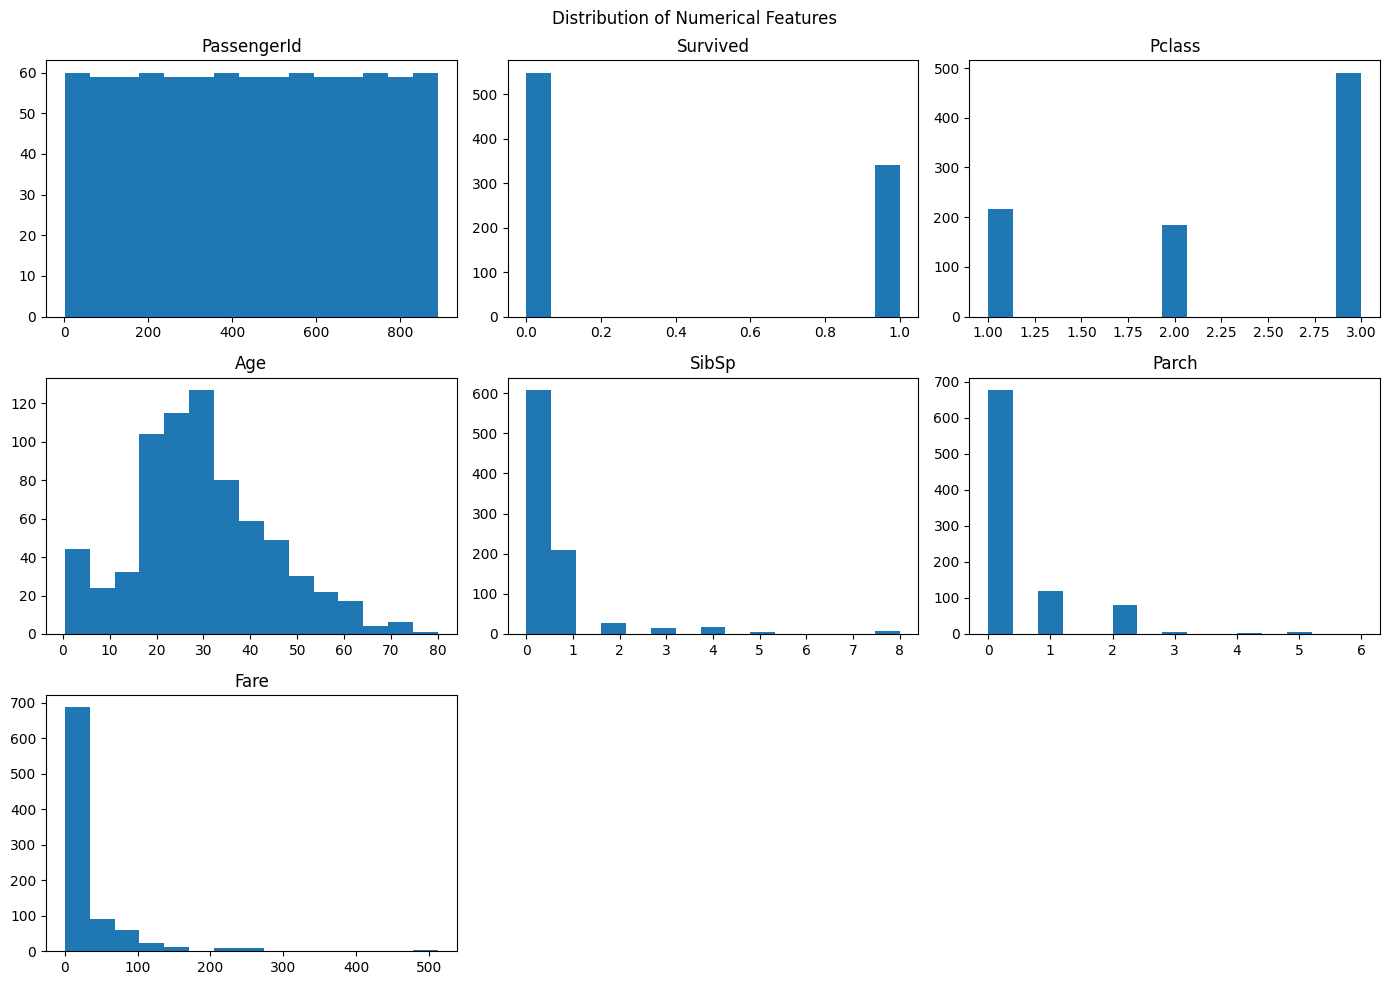

In [36]:
# Use histograms to visualize numerical features
numerical_features.hist(bins=15, figsize=(14, 10), grid=False)
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()

In [37]:
# Identify skewed features
skewed_features = numerical_features.skew()
print("Skewed Features:\n", skewed_features[skewed_features > 1])

Skewed Features:
 SibSp    3.695352
Parch    2.749117
Fare     4.787317
dtype: float64


I visualized Fare using boxplots to identify potential outliers.

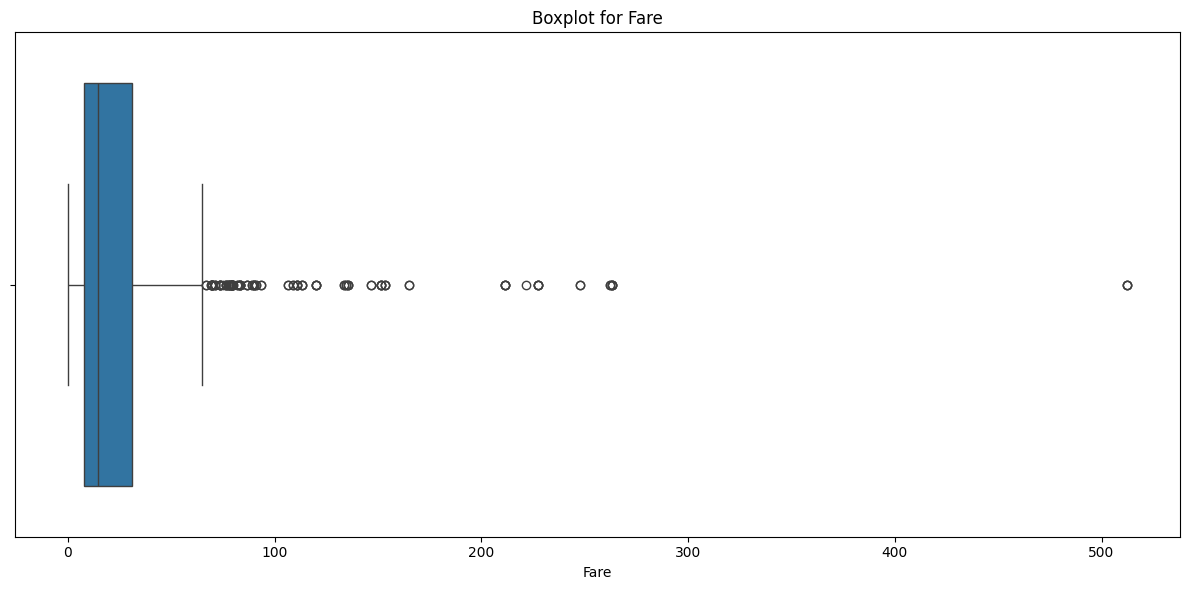

In [38]:
# Create boxplot of Fair
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fare', data=train)
plt.title('Boxplot for Fare')

plt.tight_layout()
plt.show()

I created a correlation matrix to assess the relationships between the numerical features and their correlation with the target variable, Survived. From this analysis, I observed that Fare had the highest correlation with the target, at a value of 0.25. While this is a moderate correlation, it indicates that Fare could still have some predictive power in relation to survival.

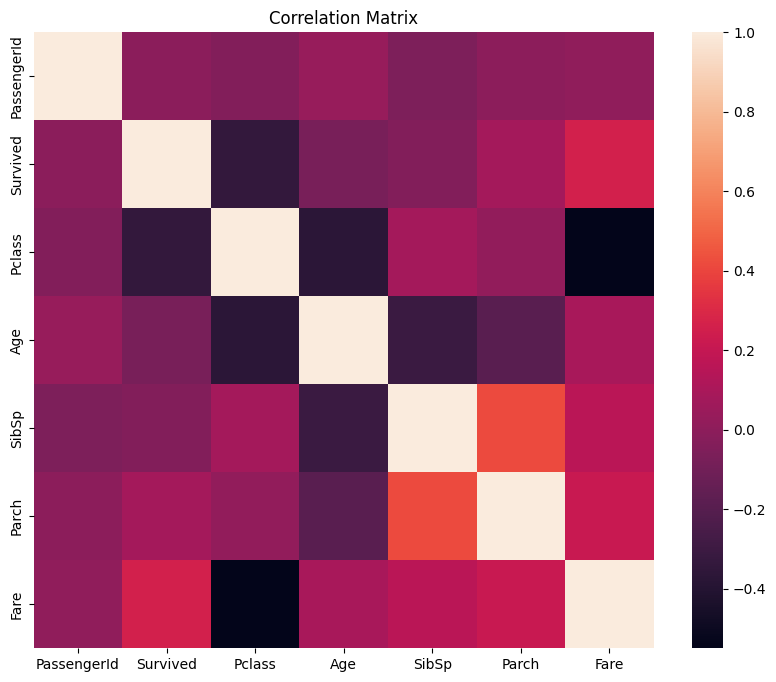

Correlations with Target Variable:
 Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


In [39]:
# Examine corrolations with target variable
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix)
plt.title("Correlation Matrix")
plt.show()

# Sort correlations with target variable (Sale Price)
target_corr = correlation_matrix['Survived'].sort_values(ascending=False)
print("Correlations with Target Variable:\n", target_corr)

I investigated the categorical features and their distributions.

In [40]:
# Analyze distributions and counts of categorical features
for feature in categorical_features:
    print(f"{feature} Distribution:\n", train[feature].value_counts(), "\n")

Name Distribution:
 Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64 

Sex Distribution:
 Sex
male      577
female    314
Name: count, dtype: int64 

Ticket Distribution:
 Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64 

Cabin Distribution:
 Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
             

I visualized the missing data using the missingno library and observed that the Cabin feature had a significant amount of missing values. Due to this, I decided to remove the Cabin feature from the dataset. Additionally, I noticed missing values in both the Age and Embarked features. To address this, I filled the missing Age values with this column's median. I did not fill the missing values in Embarked.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


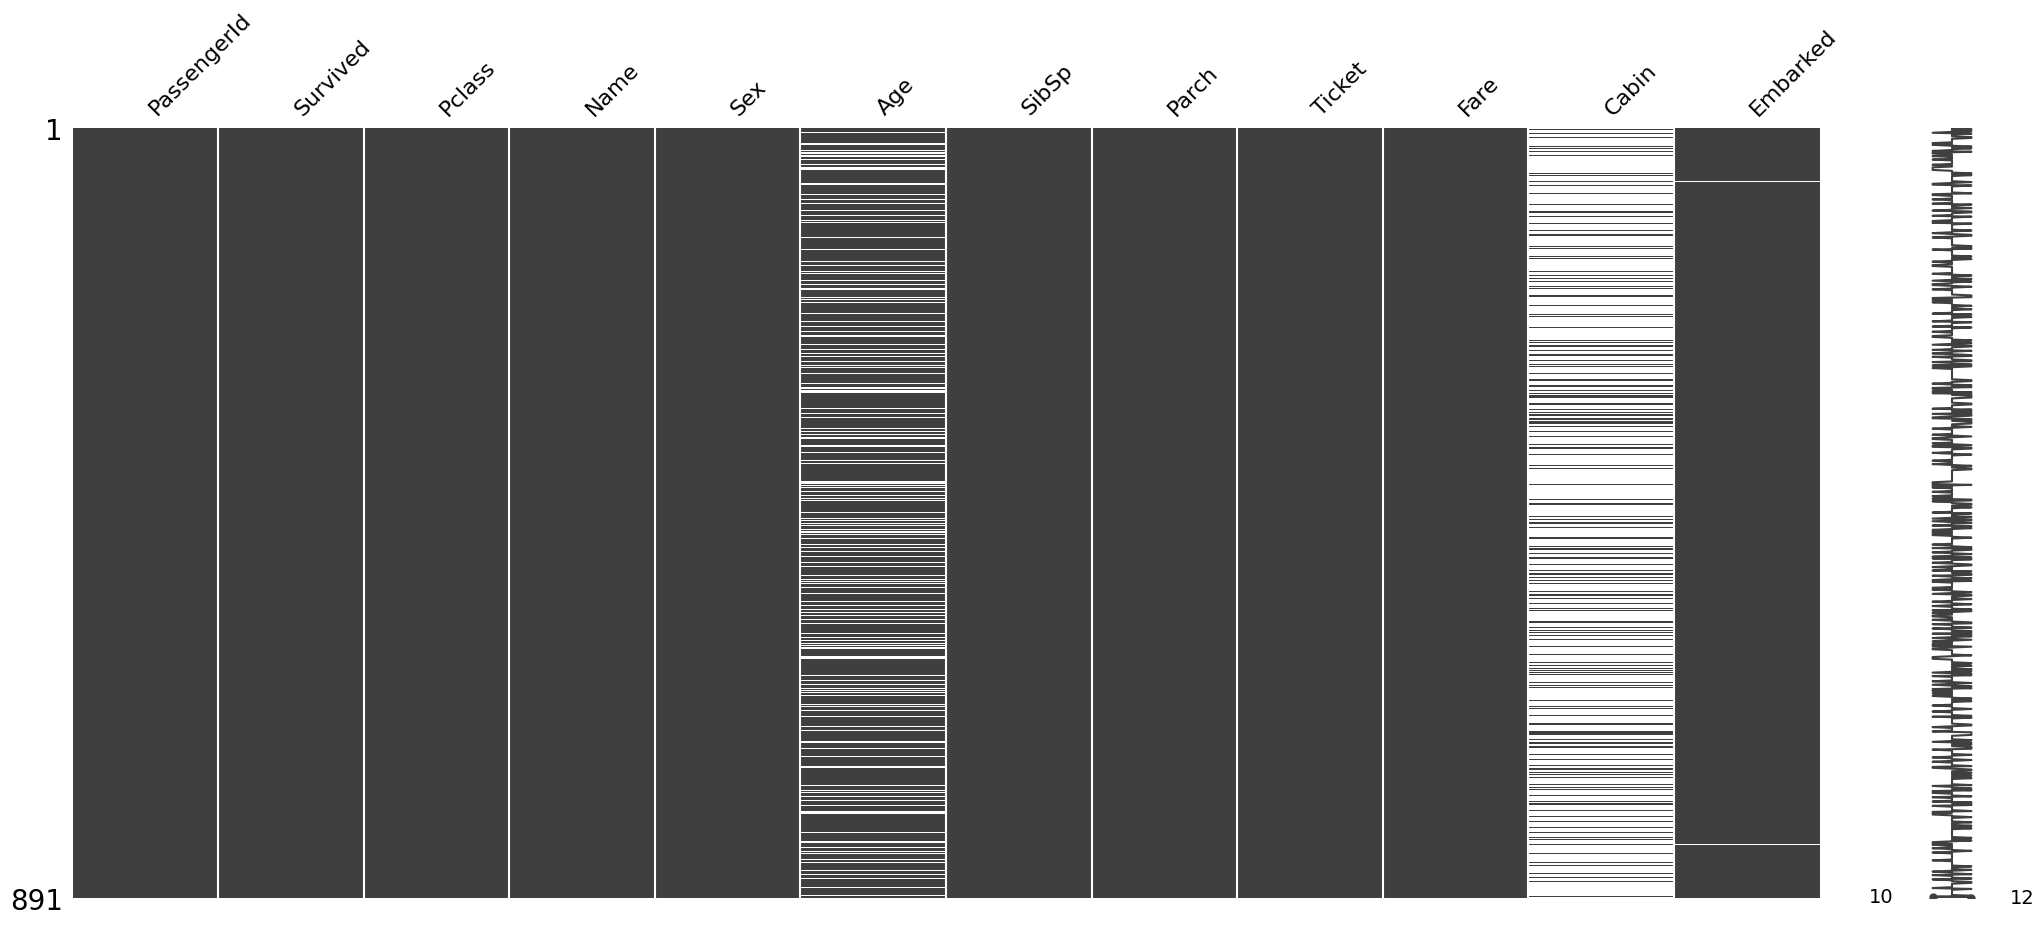

In [41]:
import missingno as msno

# Check for missing values
print(train.isnull().sum())

# Vizualize missing data using missingno
missing_data = msno.matrix(train)
plt.show()

In [42]:
# Handle missing values
# Fill missing data in 'Age' with the median age
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(train['Age'].median())

# Drop 'Cabin' as it signifigant missing data
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

During this analysis, I found that the distribution of Fare was positively skewed, so I applied a log transformation using np.log1p(). Additionally, I noticed some outliers in the Fare feature, which could potentially distort the model. To mitigate this, I capped values above 300, ensuring the data remained within a reasonable range.

In [43]:
# Apply log transformation to 'Fare'
train = train.copy()
train.loc[:, 'Fare_log'] = np.log1p(train['Fare'])
test.loc[:, 'Fare_log'] = np.log1p(test['Fare'])

# Remove outliers in 'Fare'
train = train[train['Fare'] < 300]
test = test[test['Fare'] < 300]

I encoded the categorical features in the dataset using one-hot encoding to make them suitible for the machine learning model.

In [44]:
# Use one-hot encoding for categorical features
train = pd.get_dummies(train, columns=['Sex'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex'], drop_first=True)

I engineered two new features to provide additional insight to the dataset. FamilySize was created by combining SibSp (number of siblings/spouses aboard) and Parch (number of parents/children aboard) columns, representing the total family size of each passenger. IsAlone is a binary variable indicating whether a person is traveling alone or with family. A value of 1 means the individual is traveling alone, while a value of 0 means they are traveling with family members.

In [45]:
# FamilySize = SibSp + Parch
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

# IsAlone = 1 if traveling alone
# IsAlone = 0 is traveling with family
train['IsAlone'] = train['FamilySize'].apply(lambda x: 1 if x == 0 else 0)
test['IsAlone'] = test['FamilySize'].apply(lambda x: 1 if x == 0 else 0)

I scaled both the Age and Fare features using StandardScaler. This standardization process transformed the features to have a mean of 0 and a standard deviation of 1, which ensures that all features contribute equally to the model and prevents features with larger ranges from dominating the learning process.



In [46]:
from sklearn.preprocessing import StandardScaler

# Scale Age and Fair using StandardScalar
scaler = StandardScaler()
train.loc[:, ['Age', 'Fare']] = scaler.fit_transform(train[['Age', 'Fare']])
test.loc[:, ['Age', 'Fare']] = scaler.transform(test[['Age', 'Fare']])

Based on my analysis, I decided to remove several features that were irrelevant to predicting survival. Name was excluded because it has little relevance, as each passenger has a unique name that doesn't contribute to survival prediction. I also removed the features SibSp and Parch, as they were combined into two new engineered features: FamilySize and IsAlone, which offer a more relevant and consolidated representation of the same information. Ticket Number was removed because it showed no strong correlation with survival and did not provide meaningful insights. Lastly, I removed Embarked because, although it could be linked to socioeconomic class, Pclass has a stronger correlation with survival and provides more relevant information.

In [47]:
# Drop irrelevant columns
train.drop(['Name', 'Ticket', 'SibSp', 'Parch', 'Embarked'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'SibSp', 'Parch', 'Embarked'], axis=1, inplace=True)

In [48]:
# Save the DataFrame as a CSV file
train.to_csv('train_clean.csv', index=False)
test.to_csv('test_clean.csv', index=False)

# Download the file to your device
from google.colab import files
files.download('train_clean.csv')
files.download('test_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>